In [1]:
from su2_element import SU2_element
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid']) #dependency: SciencePlots
from fibonacci import generate_vertices
from linear_discetisation import Linear_disc_points
from commutators import test_angular_momentum_comutator, fourier_vector, calc_r, La_Lb_commutator
from lattice_actions import calc_mean_distance
from derivative import angular_momentum, new_angular_momentum, mp_new_angular_momentum
import pathlib
from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool



Lattice_Path = pathlib.Path("lattices")

In [2]:
# create Lattices

N = np.array([i for i in range(5,11)])
lin_Lattices = [Linear_disc_points(i) for i in N]
fib_Lattices = []
optim_Lattices = []
for i in N:
    fib_path = list(Lattice_Path.absolute().glob(f"**/fib_{int(2**i)}.csv"))[0]
    optim_path = list(Lattice_Path.absolute().glob(f"**/optim_{int(2**i)}.csv"))[0]
    fib_Lattices.append(np.loadtxt(fib_path))
    optim_Lattices.append(np.loadtxt(optim_path))

#define initial params
ks = np.array([[0,0,0],[0.1,0,0],[0.5,0,0],[1,0,0]])
neighbors = [1,2,3,4]
Is = [0,1]
Js = [0,1]
As = [1,2,3]
angs = [angular_momentum, new_angular_momentum]

In [6]:

def wrap(ang):
    _ = ang(fib_Lattices[-2],1,n=1)
    return

In [4]:
%timeit -r 1 -n 5 wrap(mp_new_angular_momentum)

500
500
500
500
500
4.43 s ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


In [7]:
%timeit -r 1 -n 5 wrap(mp_new_angular_momentum)

500
500
500
500
500
3.19 s ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


In [5]:
%timeit -r 1 -n 5 wrap(new_angular_momentum)

6.87 s ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


In [8]:
%timeit -r 1 -n 5 wrap(new_angular_momentum)

2.54 s ± 0 ns per loop (mean ± std. dev. of 1 run, 5 loops each)


In [3]:
t1 = new_angular_momentum(fib_Lattices[-1],1)

In [4]:
t2 = mp_new_angular_momentum(fib_Lattices[-1],1)

In [19]:
t1==t2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [4]:

lin_res = np.zeros((len(neighbors), len(As), len(As), ks.shape[0], len(angs), len(lin_Lattices)))
fib_res = np.zeros((len(neighbors), len(As), len(As), ks.shape[0], len(angs), len(fib_Lattices)))
opt_res = np.zeros((len(neighbors), len(As), len(As), ks.shape[0], len(angs), len(optim_Lattices)))

mean_distances= []

for i_n, n in enumerate(neighbors):
    for i_a, a in enumerate(As):
        for i_b, b in enumerate(As):
            if a==b:
                continue
            for i_ang, ang in enumerate(angs):
                for index, (lin, fib, opt) in enumerate(zip(lin_Lattices,fib_Lattices,optim_Lattices)):
                    lin_comm = La_Lb_commutator(lin, a, b, n=n, ang=ang)
                    fib_comm = La_Lb_commutator(fib, a, b, n=n, ang=ang)
                    opt_comm = La_Lb_commutator(opt, a, b, n=n, ang=ang)
                    for i_k, k in enumerate(ks):
                        lin_vec = fourier_vector(lin, 1, k)
                        fib_vec = fourier_vector(fib, 1, k)
                        opt_vec = fourier_vector(opt, 1, k)
                        lin_res[i_n, i_a, i_b, i_k, i_ang] = calc_r(lin_comm, vec=lin_vec)
                        fib_res[i_n, i_a, i_b, i_k, i_ang] = calc_r(fib_comm, vec=fib_vec)
                        opt_res[i_n, i_a, i_b, i_k, i_ang] = calc_r(opt_comm, vec=opt_vec)
                    
lin_LaLb = lin_res.copy()
fib_LaLb = fib_res.copy()
opt_LaLb = opt_res.copy()

In [3]:

lin_res = np.zeros((len(neighbors), len(As), len(As), ks.shape[0], len(angs), len(lin_Lattices)))
fib_res = np.zeros((len(neighbors), len(As), len(As), ks.shape[0], len(angs), len(fib_Lattices)))
opt_res = np.zeros((len(neighbors), len(As), len(As), ks.shape[0], len(angs), len(optim_Lattices)))

mean_distances= []

for i_n, n in enumerate(neighbors):
    for i_a, a in enumerate(As):
        for i_b, b in enumerate(As):
            if a==b:
                continue
            for i_ang, ang in enumerate(angs):
                for index, (lin, fib, opt) in enumerate(zip(lin_Lattices,fib_Lattices,optim_Lattices)):
                    lin_comm = La_Lb_commutator(lin, a, b, n=n, ang=ang)
                    fib_comm = La_Lb_commutator(fib, a, b, n=n, ang=ang)
                    opt_comm = La_Lb_commutator(opt, a, b, n=n, ang=ang)
                    for i_k, k in enumerate(ks):
                        lin_vec = fourier_vector(lin, 1, k)
                        fib_vec = fourier_vector(fib, 1, k)
                        opt_vec = fourier_vector(opt, 1, k)
                        lin_res[i_n, i_a, i_b, i_k, i_ang] = calc_r(lin_comm, vec=lin_vec)
                        fib_res[i_n, i_a, i_b, i_k, i_ang] = calc_r(fib_comm, vec=fib_vec)
                        opt_res[i_n, i_a, i_b, i_k, i_ang] = calc_r(opt_comm, vec=opt_vec)
                    
lin_LaLb = lin_res.copy()
fib_LaLb = fib_res.copy()
opt_LaLb = opt_res.copy()

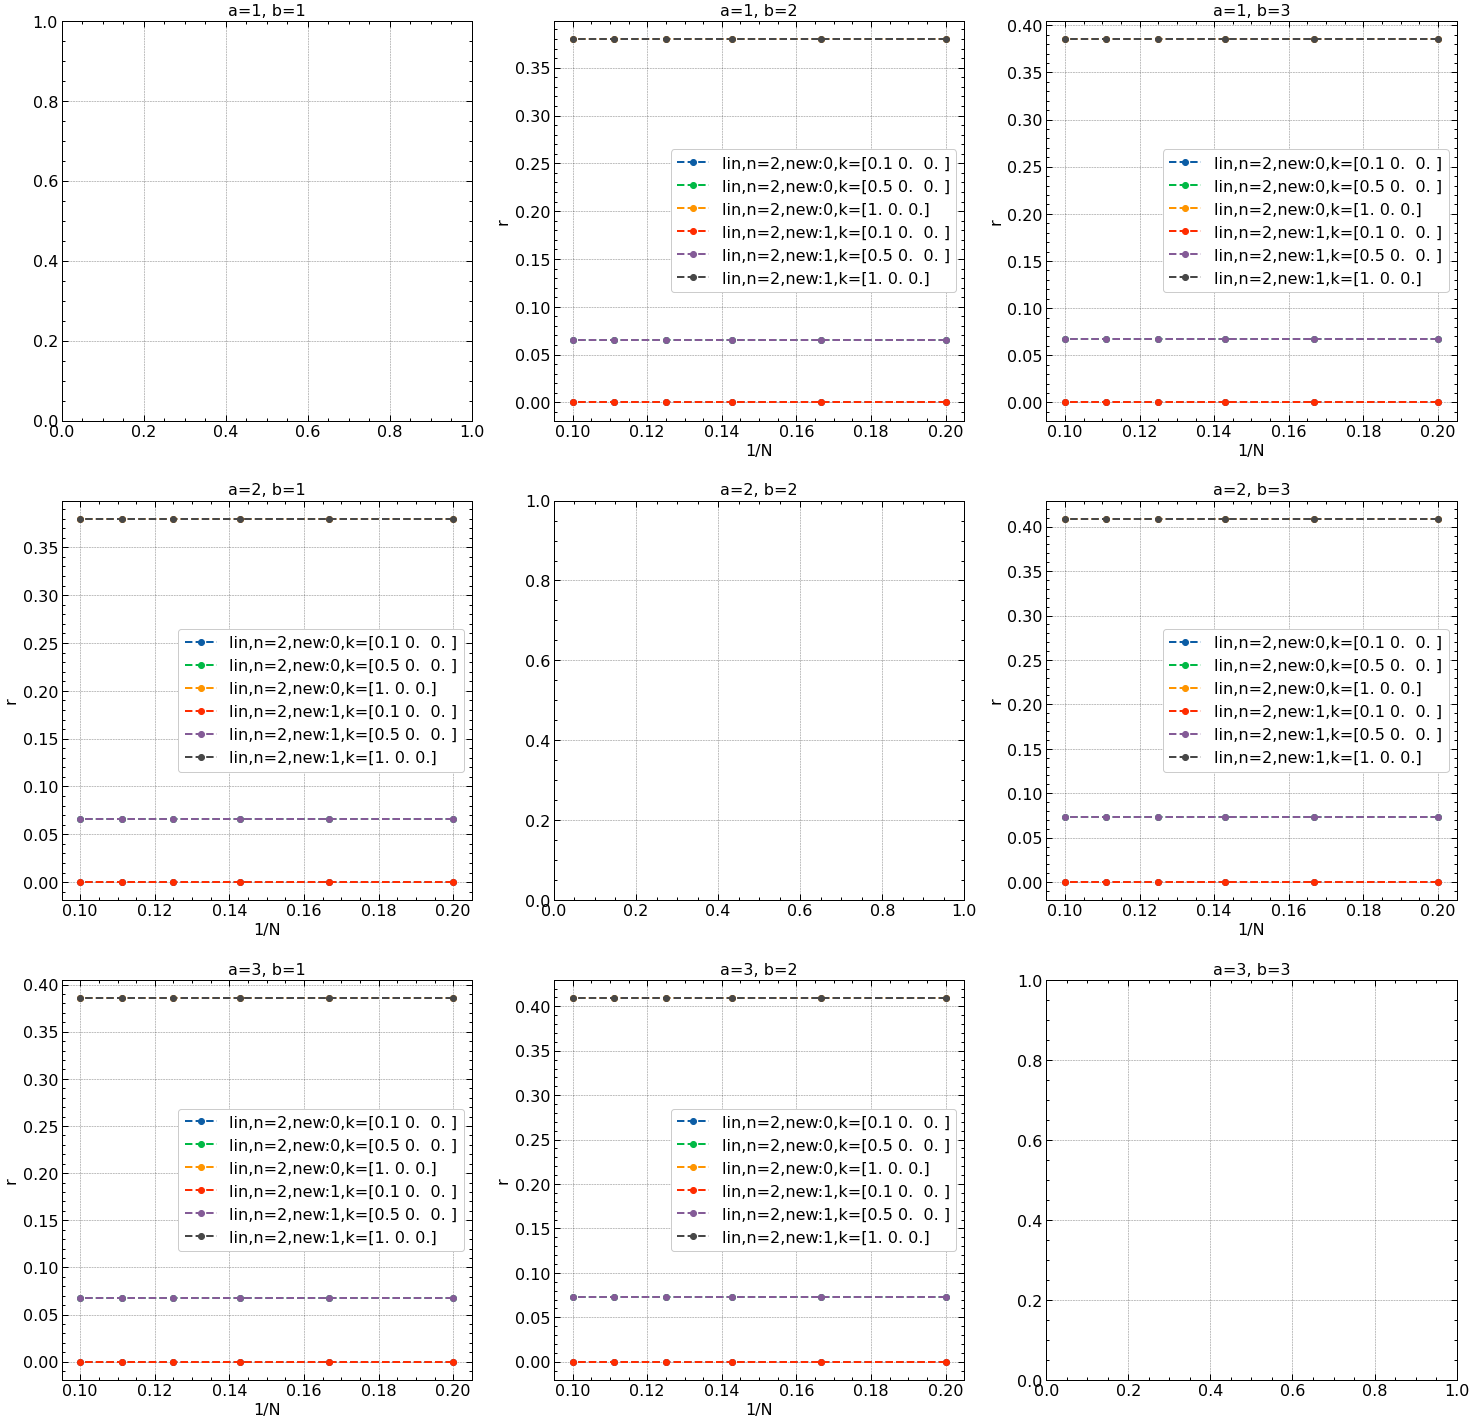

In [4]:
fig, axes = plt.subplots(3,3,figsize=(25,25))

for i_n, n in enumerate(neighbors[1:2]):
    for i_a, a in enumerate(As):
        for i_b, b in enumerate(As):
            ax = axes[i_a][i_b]
            ax.set_title(f"a={a}, b={b}")
            if a==b:
                continue
            for i_ang, ang in enumerate(angs[:2]):
                for i_k, k in enumerate(ks[1:4]):
                    y = lin_LaLb[i_n, i_a, i_b, i_k, i_ang]
                    ax.plot(1/N, y, "o--", label=f"lin,n={n},new:{i_ang},k={k}")
                    #y = fib_LaLb[i_n, i_a, i_b, i_k, i_ang]
                    #ax.plot(1/N, y, "o--", label=f"fib,n={n},new:{i_ang},k={k}")
                    #y = opt_LaLb[i_n, i_a, i_b, i_k, i_ang]
                    #ax.plot(1/N, y, "o--", label=f"opt,n={n},new:{i_ang},k={k}")

            ax.set_ylabel("r")
            ax.set_xlabel("1/N")
            ax.legend(loc="best")
            #ax.set_yscale("log")

In [7]:

mean_distances= []
lin_res = np.zeros((len(neighbors),len(Is), len(Js), len(As), ks.shape[0], len(angs), len(lin_Lattices)))
fib_res = np.zeros((len(neighbors),len(Is), len(Js), len(As), ks.shape[0], len(angs), len(fib_Lattices)))
opt_res = np.zeros((len(neighbors),len(Is), len(Js), len(As), ks.shape[0], len(angs), len(optim_Lattices)))


for i_n, n in enumerate(neighbors):
    for i in [0,1]:
        for j in [0,1]:
            for a in [1,2,3]:
                for i_ang, ang in enumerate(angs):
                    for index, (lin, fib, opt) in enumerate(zip(lin_Lattices,fib_Lattices,optim_Lattices)):
                        lin_comm = test_angular_momentum_comutator(lin, a, n=n, i=i,j=j, ang=ang)
                        fib_comm = test_angular_momentum_comutator(fib, a, n=n, i=i,j=j, ang=ang)
                        opt_comm = test_angular_momentum_comutator(opt, a, n=n, i=i,j=j, ang=ang)
                        for i_k, k in enumerate(ks):
                            vec = fourier_vector(lin, a, k)
                            lin_res[i_n, i, j, a-1, i_k, i_ang, index] = calc_r(lin_comm, vec=vec).real
                            vec = fourier_vector(fib, a, k)
                            fib_res[i_n, i, j, a-1, i_k, i_ang, index] = calc_r(fib_comm, vec=vec).real
                            vec = fourier_vector(opt, a, k)
                            opt_res[i_n, i, j, a-1, i_k, i_ang, index] = calc_r(opt_comm, vec=vec).real
                    
lin_res = np.mean(lin_res, axis=3)
fib_res = np.mean(fib_res, axis=3)
opt_res = np.mean(opt_res, axis=3)

lin_LaU = lin_res.copy()
fib_LaU = fib_res.copy()
opt_LaU = opt_res.copy()

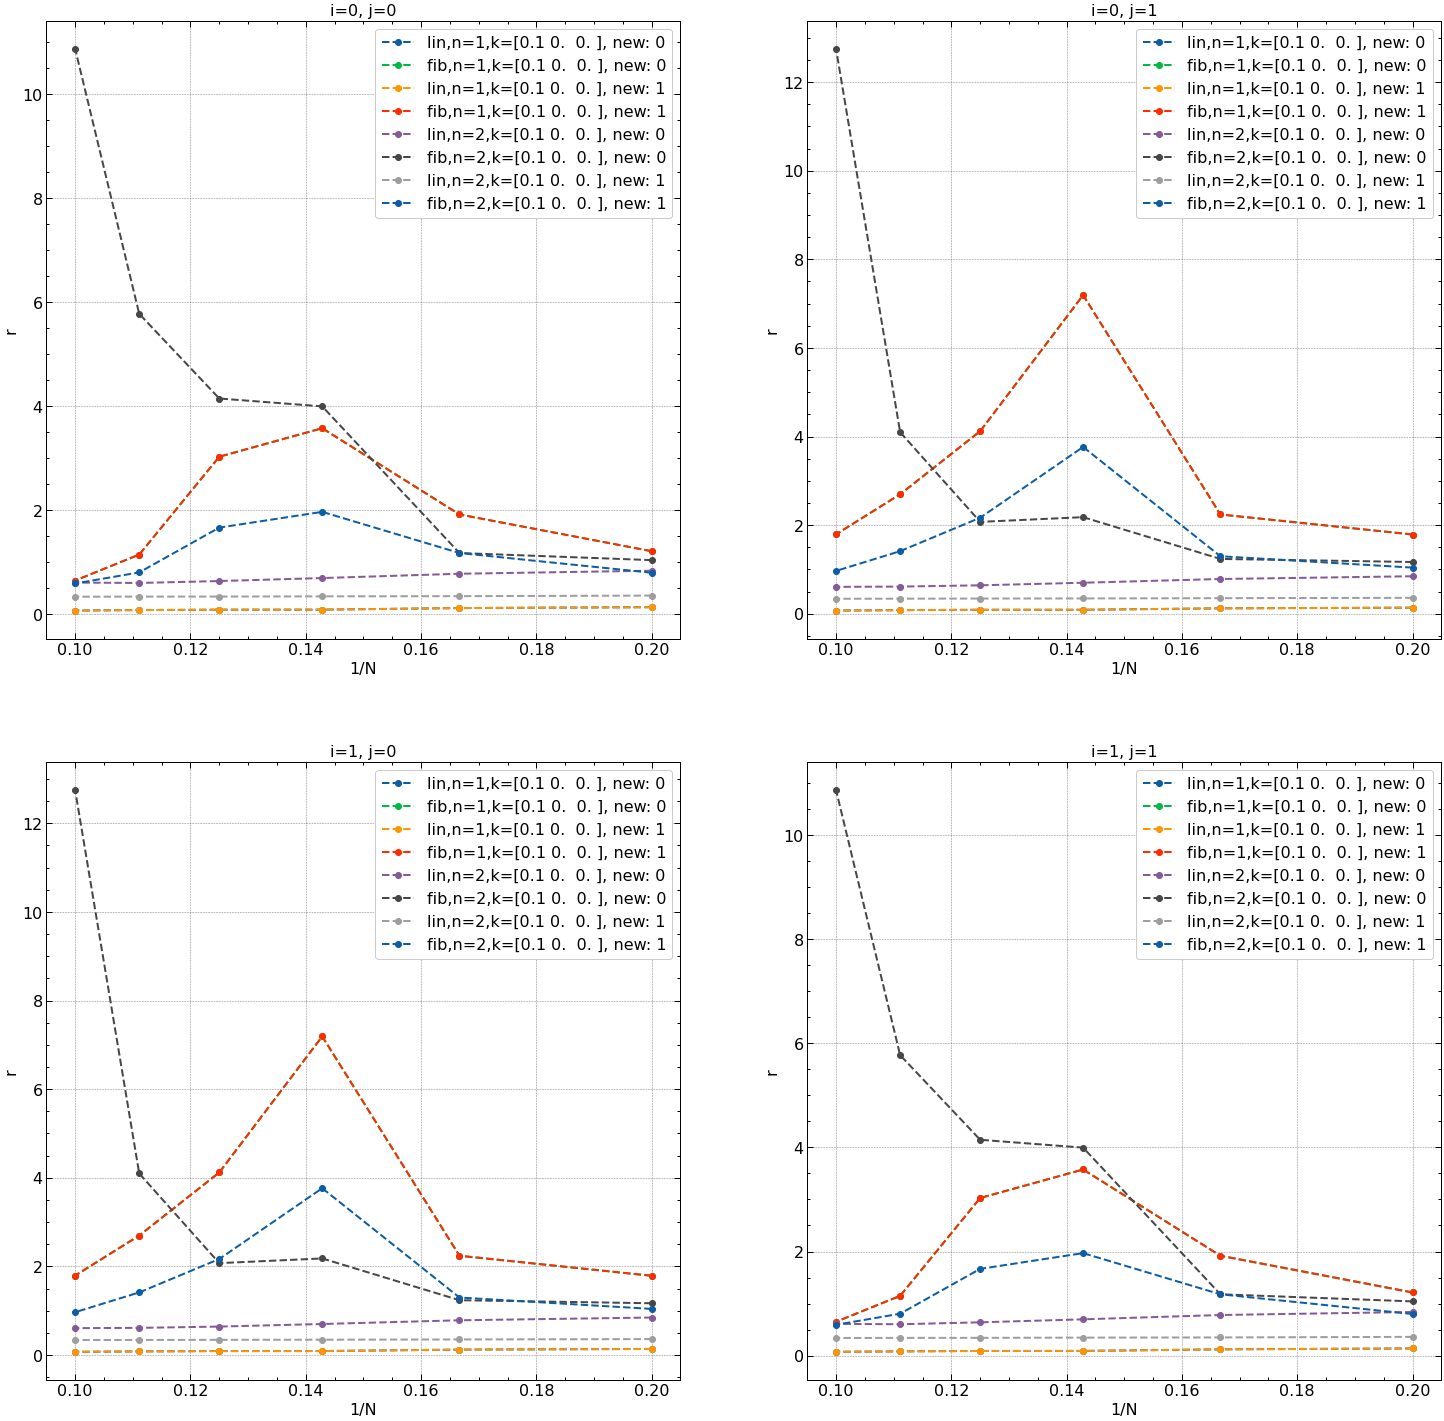

In [41]:
fig, axes = plt.subplots(2,2,figsize=(25,25))

#plotting
for i0, n in enumerate(neighbors[:2]):
    for i1, i in enumerate(Is):
        for i2, j in enumerate(Js):
            ax = axes[i1][i2]
            for i3, k in enumerate(ks[1:2]):
                for i4, _ in enumerate(angs[:2]):                
                    y = lin_LaU[i0,i1,i2,i3,i4]
                    ax.plot(1/N, y, 'o--', label=f"lin,n={n},k={k}, new: {i4}")
                    y = fib_LaU[i0,i1,i2,i3,i4]
                    ax.plot(1/N, y, 'o--', label=f"fib,n={n},k={k}, new: {i4}")
                    #y = opt_LaU[i0,i1,i2,i3,i4]
                    #ax.plot(1/N, y, 'o--', label=f"opt,n={n},k={k}, new: {i4}")
            ax.set_title(f"i={i}, j={j}")
            ax.legend(loc="best")
            ax.set_ylabel("r")
            ax.set_xlabel("1/N")

\begin{equation*}
    z = \big([L_a,U_{il}] - (t_a)_{ji} U_{il})\cdot v(k)
\end{equation*}

\begin{equation*}
    r = \frac{1}{N}\sum_i |z_i|
\end{equation*}

### Eigenvalues

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid']) #dependency: SciencePlots
from fibonacci import generate_vertices, generate_vertices_angles
from lattice_optimisation import lattice_optimizer, angles_to_cartesian
from hamiltonian import calc_eigenvals, continuum_spectrum, generate_Ldagger_L
from derivative import new_angular_momentum

num_eigenvals = 75
id_s = list(range(num_eigenvals))
eigenvals = continuum_spectrum(num_eigenvals)


neighbors = [1,2,4]
exponents = [8,10, 11,12]
fib_Lattices = [generate_vertices(2**i) for i in exponents]
optim_Lattices = [angles_to_cartesian(lattice_optimizer(generate_vertices_angles(2**i))[0]) for i in exponents]

fib_eigenvals = np.zeros((len(neighbors),len(exponents), num_eigenvals))
optim_eigenvals = np.zeros((len(neighbors),len(exponents), num_eigenvals))
print(fib_eigenvals.shape)

for index, (exponent, fib, optim) in enumerate(zip(exponents,fib_Lattices, optim_Lattices)):
    for i,n in enumerate(neighbors):
        fib_L = generate_Ldagger_L(fib,n=n)#,ang=new_angular_momentum)
        fib_eigenvals[i,index,:] = calc_eigenvals(fib_L, k=num_eigenvals)
        optim_L = generate_Ldagger_L(optim,n=n)#, ang=new_angular_momentum)
        optim_eigenvals[i,index,:] = calc_eigenvals(optim_L, k=num_eigenvals)

(3, 4, 75)


<ipython-input-22-062293e061a8>:26: ComplexWarning: Casting complex values to real discards the imaginary part
  fib_eigenvals[i,index,:] = calc_eigenvals(fib_L, k=num_eigenvals)
<ipython-input-22-062293e061a8>:28: ComplexWarning: Casting complex values to real discards the imaginary part
  optim_eigenvals[i,index,:] = calc_eigenvals(optim_L, k=num_eigenvals)


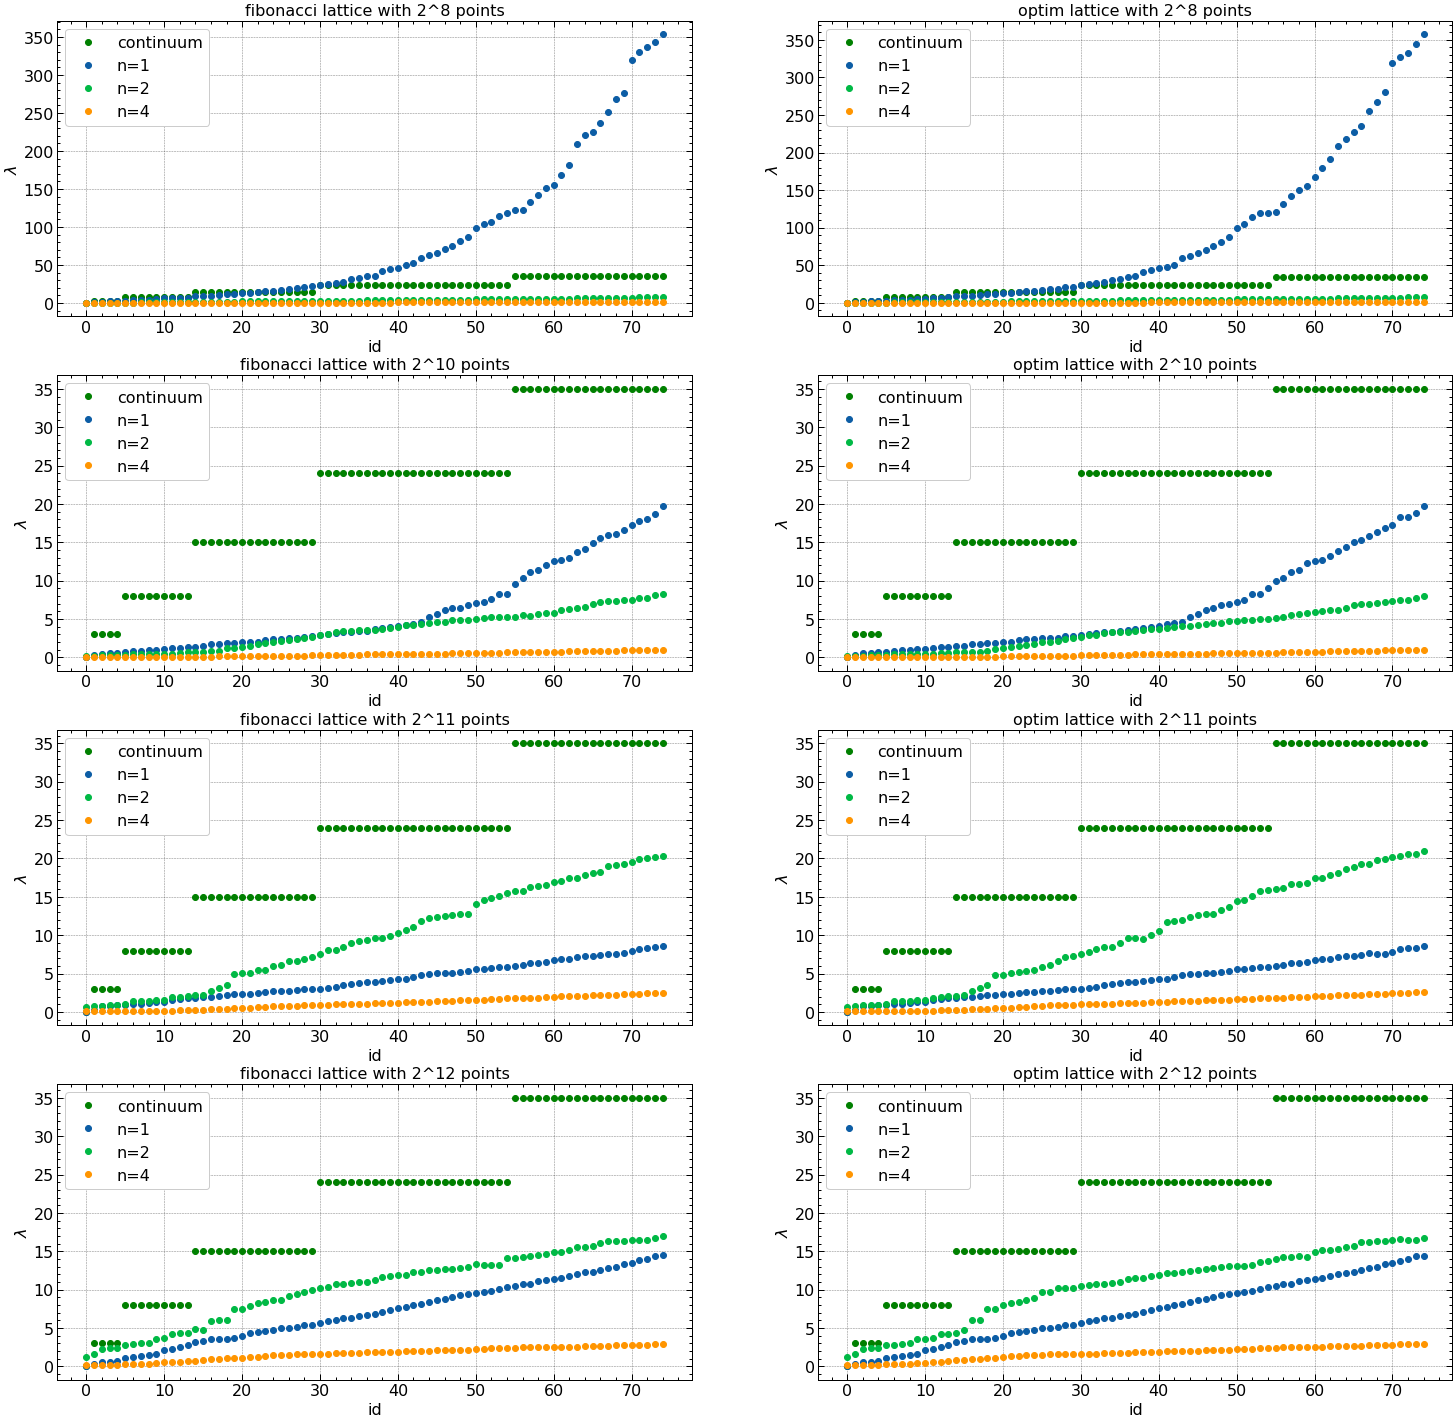

In [23]:
fig, axes = plt.subplots(len(exponents),2,figsize=(25,25))

for index, exponent in enumerate(exponents):
    ax = axes[index,:]
    ax[0].plot(id_s, eigenvals, "o", label = "continuum", color="green")
    ax[1].plot(id_s, eigenvals, "o", label = "continuum", color="green")
    for i,n in enumerate(neighbors):
        ax[0].plot(id_s, fib_eigenvals[i,index,:], "o", label=rf"n={n}")
        ax[1].plot(id_s, optim_eigenvals[i,index,:], "o", label=rf"n={n}")
    ax[0].set_title(rf"fibonacci lattice with 2^{exponent} points")
    ax[1].set_title(rf"optim lattice with 2^{exponent} points")
    ax[0].legend(loc="best")
    ax[1].legend(loc="best")
    ax[0].set_xlabel("id")
    ax[1].set_xlabel("id")
    ax[0].set_ylabel(r"$\lambda$")
    ax[1].set_ylabel(r"$\lambda$")


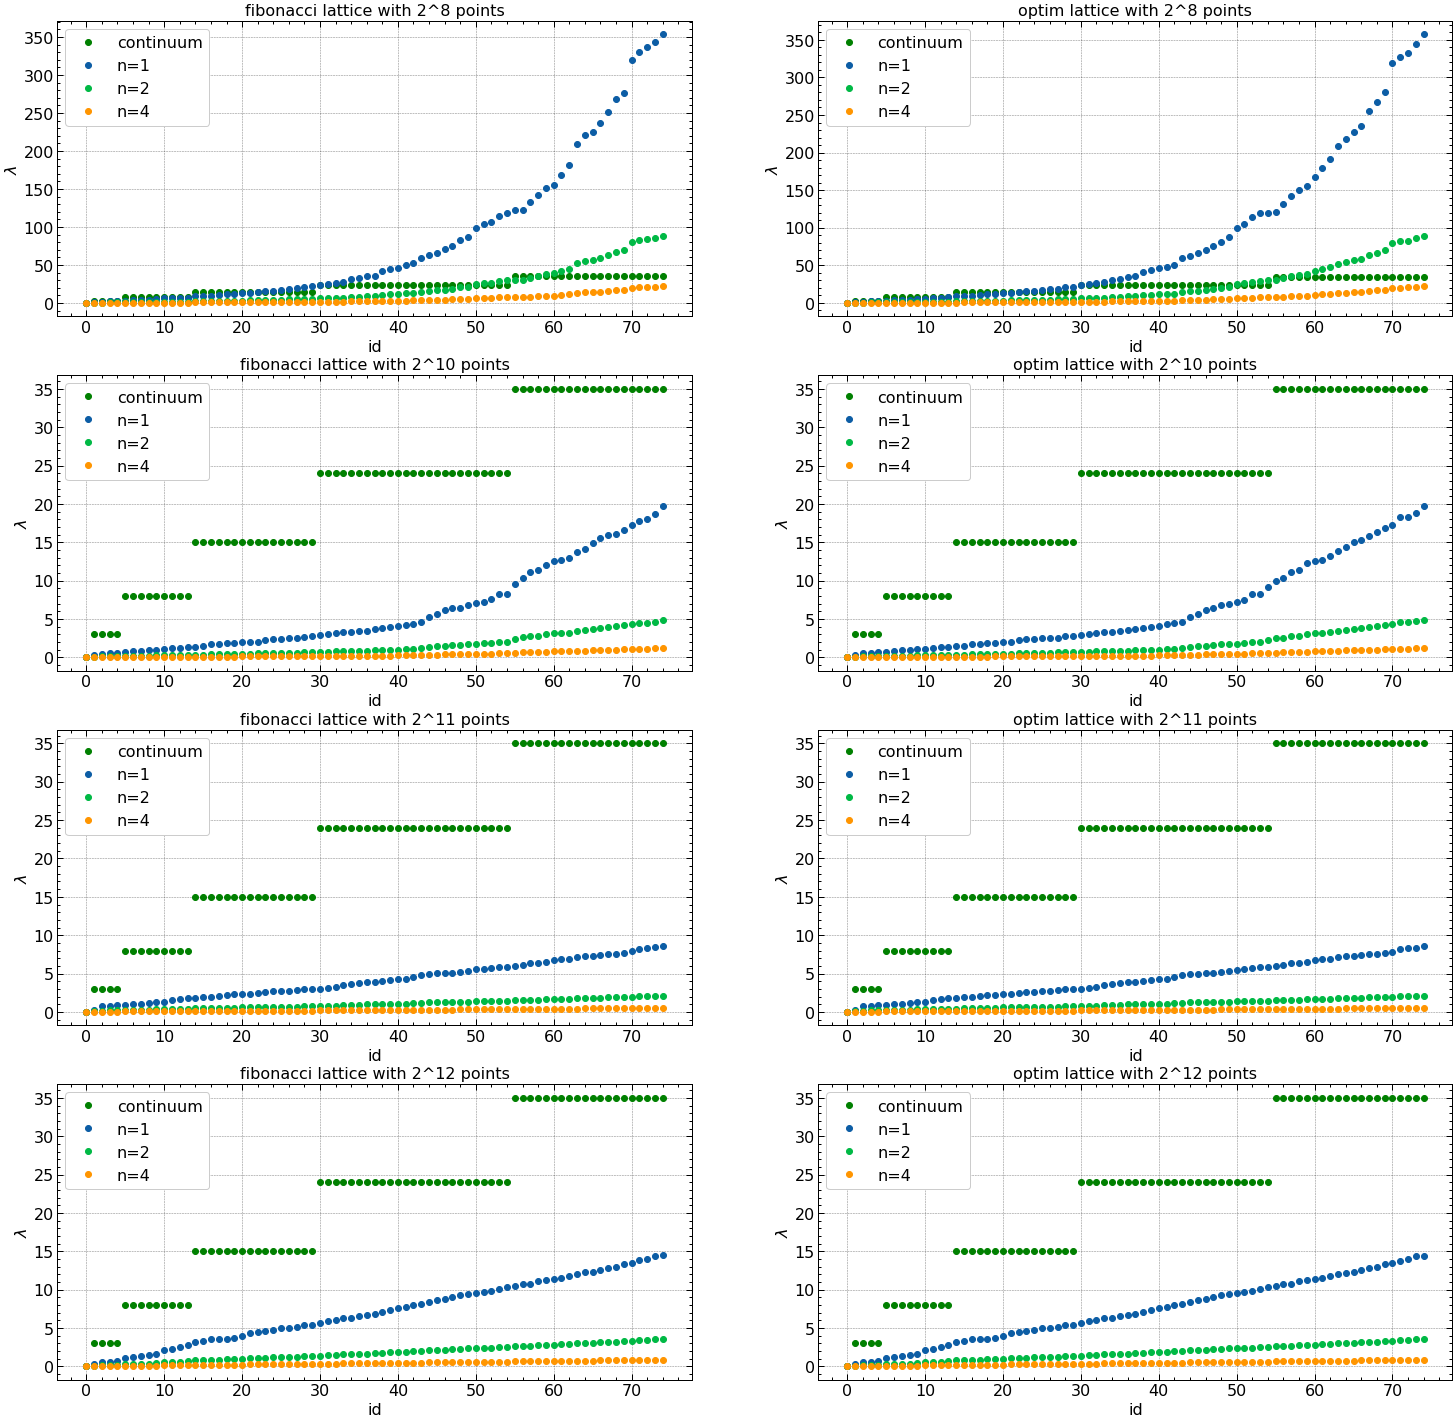

In [10]:
fig, axes = plt.subplots(len(exponents),2,figsize=(25,25))

for index, exponent in enumerate(exponents):
    ax = axes[index,:]
    ax[0].plot(id_s, eigenvals, "o", label = "continuum", color="green")
    ax[1].plot(id_s, eigenvals, "o", label = "continuum", color="green")
    for i,n in enumerate(neighbors):
        ax[0].plot(id_s, fib_eigenvals[i,index,:], "o", label=rf"n={n}")
        ax[1].plot(id_s, optim_eigenvals[i,index,:], "o", label=rf"n={n}")
    ax[0].set_title(rf"fibonacci lattice with 2^{exponent} points")
    ax[1].set_title(rf"optim lattice with 2^{exponent} points")
    ax[0].legend(loc="best")
    ax[1].legend(loc="best")
    ax[0].set_xlabel("id")
    ax[1].set_xlabel("id")
    ax[0].set_ylabel(r"$\lambda$")
    ax[1].set_ylabel(r"$\lambda$")


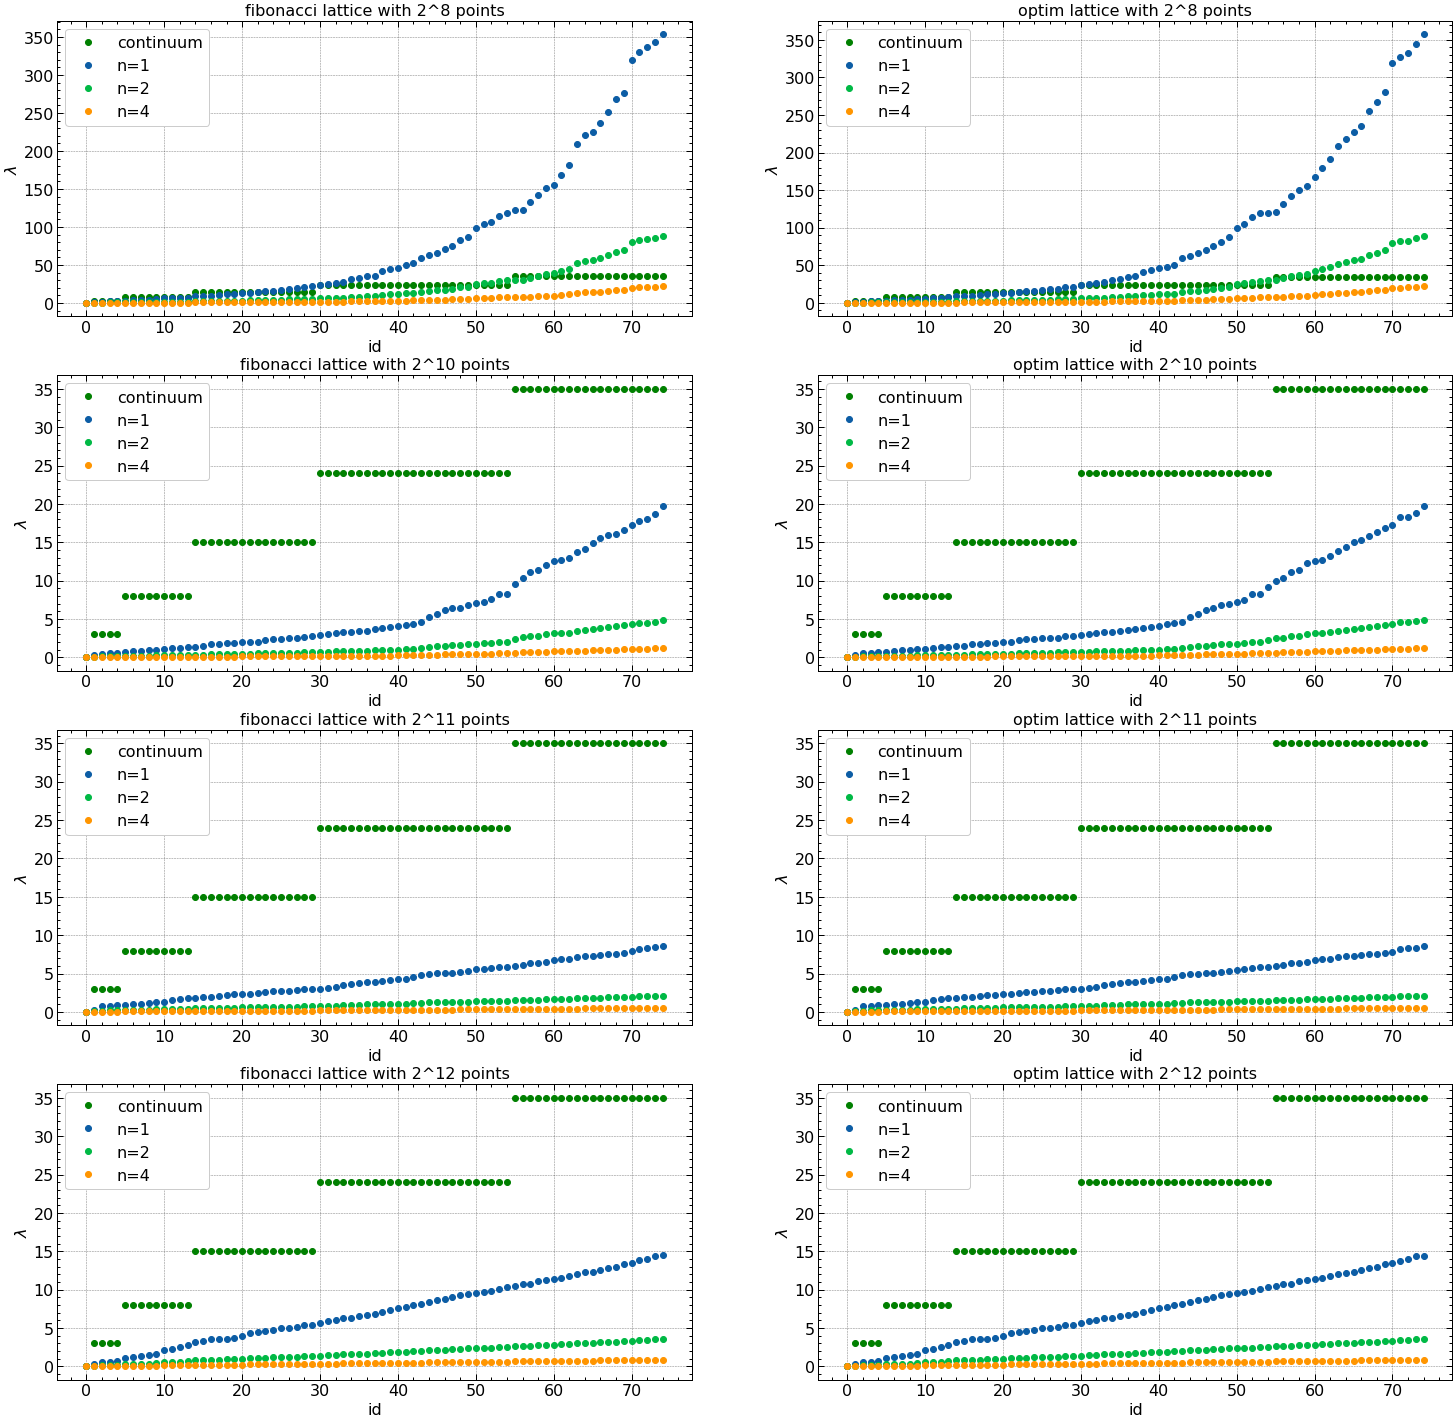

In [11]:
fig, axes = plt.subplots(len(exponents),2,figsize=(25,25))

for index, exponent in enumerate(exponents):
    ax = axes[index,:]
    ax[0].plot(id_s, eigenvals, "o", label = "continuum", color="green")
    ax[1].plot(id_s, eigenvals, "o", label = "continuum", color="green")
    for i,n in enumerate(neighbors):
        ax[0].plot(id_s, fib_eigenvals[i,index,:], "o", label=rf"n={n}")
        ax[1].plot(id_s, optim_eigenvals[i,index,:], "o", label=rf"n={n}")
    ax[0].set_title(rf"fibonacci lattice with 2^{exponent} points")
    ax[1].set_title(rf"optim lattice with 2^{exponent} points")
    ax[0].legend(loc="best")
    ax[1].legend(loc="best")
    ax[0].set_xlabel("id")
    ax[1].set_xlabel("id")
    ax[0].set_ylabel(r"$\lambda$")
    ax[1].set_ylabel(r"$\lambda$")




##### Idea:
use and maximise
\begin{equation*}
    y = \frac{1}{N}\sum_{i \ne j} d(X_i, X_j) + \lambda(R-1)
\end{equation*}
by using spherical coordinates and restricting the sum to the nearest n neighbors of each Lattice point $X_i$ now consisting of the three angles $X_i = (\psi_i, \theta_i, \Phi_i)$
\begin{equation*}
    y = \frac{1}{N}\sum_{i \ne j} NO
\end{equation*}
(this is the mean distance of the nearest n neighbors of each Lattice point; $N = n\cdot dim(X_i)$)

##### Implementation:
then calculating the gradient $\nabla y$ and iteratively adding it to the current Lattice coordinates as
\begin{equation*}
    X_{new} = X_{old} + d\nabla y
\end{equation*}

using the difference $|y_{new} - y_{old}| < \epsilon$ as a cutoff as well as the factor $d$ (I don't know why using this as $d$ works as well as it does)

In [ ]:
from lattice_optimisation import lattice_optimizer
from fibonacci import generate_vertices_angles

N = np.array([i for i in range(4,10)])
eps = 1e-10
plt.figure(figsize=figsize)
for exp in N:
    angles = generate_vertices_angles(2**exp)
    _,mean,arr = lattice_optimizer(angles, eps=eps, neighbors=1)

    plt.plot(arr,"o--", label=rf"$2^{exp}$")


plt.xlabel("iteration")
plt.ylabel("y")
plt.legend(loc="best")
plt.title("one neighbor")
plt.yscale("log")
plt.show()

In [ ]:
N = np.array([i for i in range(4,10)])
eps = 1e-10
plt.figure(figsize=figsize)
for exp in N:
    angles = generate_vertices_angles(2**exp)
    _,mean,arr = lattice_optimizer(angles, eps=eps, neighbors=1)
    arr = (mean-arr)[:-1]
    plt.plot(arr,"o--", label=rf"$2^{exp}$")

plt.hlines(eps, 0,25, label=rf"$\epsilon$")
plt.xlabel("iteration")
plt.ylabel("mean_dist[n]-mean_dist[i]")
plt.legend(loc="best")
plt.title("one neighbor")
plt.yscale("log")
plt.show()

In [ ]:
N = np.array([i for i in range(4,10)])
eps = 1e-10
plt.figure(figsize=figsize)
for exp in N:
    angles = generate_vertices_angles(2**exp)
    _,mean,arr = lattice_optimizer(angles, eps=eps, neighbors=3)
    plt.plot(arr,"o--", label=rf"$2^{exp}$")

plt.xlabel("iteration")
plt.ylabel("y")
plt.legend(loc="best")
plt.title("three neighbors")
plt.yscale("log")
plt.show()

In [ ]:
N = np.array([i for i in range(4,10)])
eps = 1e-10
plt.figure(figsize=figsize)
for exp in N:
    angles = generate_vertices_angles(2**exp)
    _,mean,arr = lattice_optimizer(angles, eps=eps, neighbors=3)
    arr = (mean-arr)[:-1]
    plt.plot(arr,"o--", label=rf"$2^{exp}$")

plt.hlines(eps, 0,25, label=rf"$\epsilon$")
plt.xlabel("iteration")
plt.ylabel("mean_dist[n]-mean_dist[i]")
plt.legend(loc="best")
plt.title("three neighbors")
plt.yscale("log")
plt.show()

In [ ]:
N = np.array([i for i in range(4,10)])
eps = 1e-10
plt.figure(figsize=figsize)
for exp in N:
    angles = generate_vertices_angles(2**exp)
    _,mean,arr = lattice_optimizer(angles, eps=eps, neighbors=4)
    arr = (mean-arr)[:-1]
    plt.plot(arr,"o--", label=rf"$2^{exp}$")

plt.hlines(eps, 0,25, label=rf"$\epsilon$")
plt.xlabel("iteration")
plt.ylabel("mean_dist[n]-mean_dist[i]")
plt.legend(loc="best")
plt.title("four neighbors")
plt.yscale("log")
plt.show()

In [ ]:
N = np.array([i for i in range(5,10)])
eps = 1e-10
plt.figure(figsize=figsize)
for exp in N:
    angles = generate_vertices_angles(2**exp)
    _,mean,arr = lattice_optimizer(angles, eps=eps, neighbors=5)
    arr = (mean-arr)[:-1]
    plt.plot(arr,"o--", label=rf"$2^{exp}$")

plt.hlines(eps, 0,25, label=rf"$\epsilon$")
plt.xlabel("iteration")
plt.ylabel("mean_dist[n]-mean_dist[i]")
plt.legend(loc="best")
plt.title("five neighbors")
plt.yscale("log")
plt.show()